In [2]:
%load_ext autoreload
%autoreload 2

import sys

import lightkurve as lk

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import KeplerTargetPixelFile, LightCurve
from lightkurve.prf import StarPrior, BackgroundPrior, FocusPrior, MotionPrior, TPFModel, PRFPhotometry

from oktopus import GaussianPrior, UniformPrior

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.utils.data import get_pkg_data_filename


In [3]:
# tpf.inject() in targetpixelfile.py --> KeplerTargetPixelFile

In [4]:
tpf = KeplerTargetPixelFile("https://archive.stsci.edu/missions/kepler/target_pixel_files/0084/008462852/"
                            "kplr008462852-2013098041711_lpd-targ.fits.gz", quality_mask='hardest')

In [5]:
# Taking coords from the tpf object
c = SkyCoord(tpf.ra, tpf.dec, unit="deg")

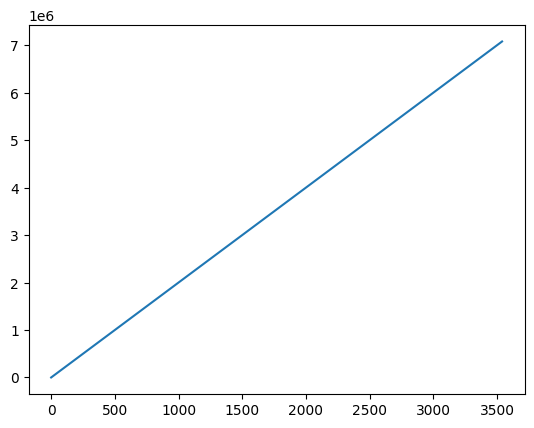

In [6]:
# Creating a fake timeseries
time = np.arange(0, tpf.shape[0], 1)
flux = 2000*time + 0

plt.plot(time, flux)

In [7]:
# Injecting the time series into PRF frames defined by TPF coords.
# Returns flux array (should return new TPF object in the future)
# Do we need to require coordinates to be input, if you must define a TPF
# object anyway?

new_tpfs = tpf.inject(c, flux)

 85%|████████▌ | 3023/3540 [06:12<01:16,  6.75it/s]

56 (11, 11) nan nan


100%|██████████| 3540/3540 [00:03<00:00, 1166.38it/s]


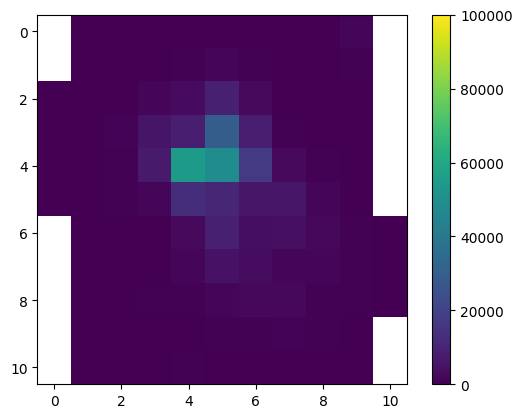

In [8]:
plt.imshow(new_tpfs[10], vmin=0, vmax=100000);
plt.colorbar();

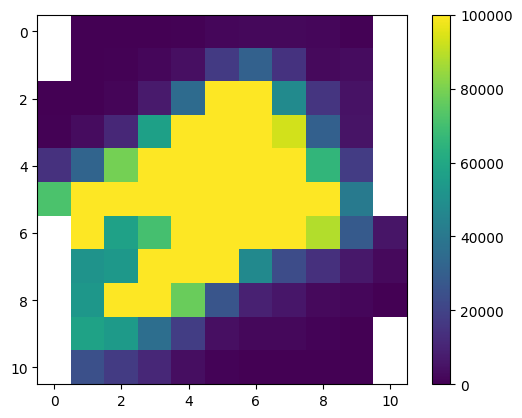

In [9]:
plt.imshow(new_tpfs[3500], vmin=0, vmax=100000);
plt.colorbar();